https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz

https://openi.nlm.nih.gov/imgs/collections/NLMCXR_reports.tgz

In [4]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 7.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 6.8 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
with open("./ecgen/1.xml", 'r') as f:
    print(f.read())

<?xml version="1.0" encoding="utf-8"?>
<eCitation>
   <meta type="rr"/>
   <uId id="CXR1"/>
   <pmcId id="1"/>
   <docSource>CXR</docSource>
   <IUXRId id="1"/>
   <licenseType>open-access</licenseType>
   <licenseURL>http://creativecommons.org/licenses/by-nc-nd/4.0/</licenseURL>
   <ccLicense>byncnd</ccLicense>
   <articleURL/>
   <articleDate>2013-08-01</articleDate>
   <articleType>XR</articleType>
   <publisher>Indiana University</publisher>
   <title>Indiana University Chest X-ray Collection</title>
   <note>The data are drawn from multiple hospital systems.</note>
   <specialty>pulmonary diseases</specialty>
   <subset>CXR</subset>
   <MedlineCitation Owner="Indiana University" Status="supplied by publisher">
   
      <Article PubModel="Electronic">
      
         <Journal>
         
            <JournalIssue>
            
               <PubDate>
               
                  <Year>2013</Year>
               
                  <Month>08</Month>
               
            

In [3]:
ls

NLMCXR_png/         Untitled.ipynb      encodings.pkl       val_def.mat
NLMCXR_reports.tgz  ecgen/              train_def.mat


In [4]:
print('Total Images in data : ', len(os.listdir('NLMCXR_png')))
print('Total Reports in data : ', len(os.listdir('ecgen')))

Total Images in data :  7471
Total Reports in data :  3955


In [5]:
import xml.etree.ElementTree as ET
columns = ['image_id', 'caption', 'comparision', 'indication', 'findings', 'impression', 'height', 'width']
df = pd.DataFrame(columns = columns)
for file in tqdm(os.listdir("ecgen/")):
    if file.endswith(".xml"):
        k = "ecgen/"
        path = k + file
        mytree = ET.parse(path)
        comparision = mytree.findtext(".//AbstractText[@Label='COMPARISON']")
        indication = mytree.findtext(".//AbstractText[@Label='INDICATION']")
        findings = mytree.findtext(".//AbstractText[@Label='FINDINGS']")
        impression = mytree.findtext(".//AbstractText[@Label='IMPRESSION']")
        mytree = ET.parse(path)
        for x in mytree.findall("parentImage"):
            image_id = 'NLMCXR_png/' + x.attrib['id']+".png"
#             filename = image_id
            image = cv2.imread(image_id)
            height, width, channels = image.shape
            caption = '' if x.find('caption').text is None else x.find('caption').text
            row = [image_id, caption, comparision, indication, findings, impression, height, width]
            df.loc[len(df)] = row

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3955/3955 [00:56<00:00, 69.50it/s]


In [6]:
df.shape

(7470, 8)

In [7]:
df.head()

,image_id,caption,comparision,indication,findings,impression,height,width
0,NLMCXR_png/CXR162_IM-0401-1001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,420,512
1,NLMCXR_png/CXR162_IM-0401-2001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,624,512
2,NLMCXR_png/CXR1390_IM-0249-1001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512
3,NLMCXR_png/CXR1390_IM-0249-2001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512
4,NLMCXR_png/CXR604_IM-2193-1001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,512,512


In [8]:
empty_indices = df[df["findings"] == ""].index
df.drop(empty_indices, inplace=True)

In [9]:
df.shape

(6473, 8)

In [10]:
df.dropna()

,image_id,caption,comparision,indication,findings,impression,height,width
0,NLMCXR_png/CXR162_IM-0401-1001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,420,512
1,NLMCXR_png/CXR162_IM-0401-2001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,624,512
2,NLMCXR_png/CXR1390_IM-0249-1001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512
3,NLMCXR_png/CXR1390_IM-0249-2001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512
4,NLMCXR_png/CXR604_IM-2193-1001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,512,512
...,...,...,...,...,...,...,...,...
7462,NLMCXR_png/CXR2680_IM-1154-1001.png,Xray Chest PA and Lateral,,XXXX,The lungs are clear. There is no pleural effus...,No acute pulmonary disease.,519,512
7463,NLMCXR_png/CXR2680_IM-1154-2001.png,Xray Chest PA and Lateral,,XXXX,The lungs are clear. There is no pleural effus...,No acute pulmonary disease.,518,512
7464,NLMCXR_png/CXR2680_IM-1154-3001.png,Xray Chest PA and Lateral,,XXXX,The lungs are clear. There is no pleural effus...,No acute pulmonary disease.,572,512
7465,NLMCXR_png/CXR85_IM-2372-1001.png,Xray Chest PA and Lateral,None,Status post cardiac catheterization.,There are scattered calcified granulomas. No f...,No evidence of active disease.,511,512


In [11]:
df['image_caption'] = df['caption'].fillna('Unknown')
df['comparison'] = df['comparision'].fillna('No Comparison')
df['indication'] = df['indication'].fillna('No Indication')
df['findings'] = df['findings'].fillna('No Findings')
df['impression'] = df['impression'].fillna('No Impression')

'Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses.'

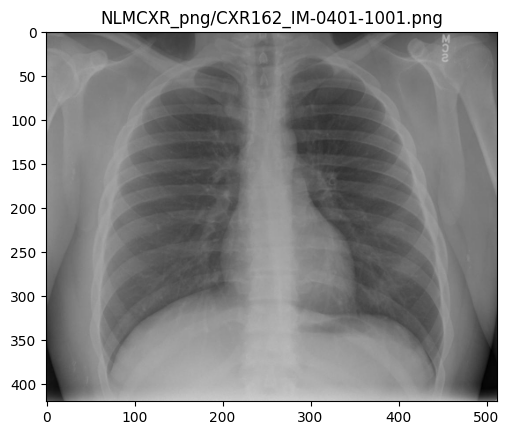

In [12]:
img = cv2.imread(df['image_id'].values[0])
plt.imshow(img)
plt.title(df['image_id'].values[0])
df['findings'].values[0]

In [13]:
images = {}
findings = {}
for img, fin in df[['image_id', 'findings']].values:
    fn = img.split('.')[0]
    file_type = fn.split('-')[:-1]
    fn = '-'.join(file_type)
    if fn not in images:
        images[fn] = 1
        findings[fn] = fin
    else:
        images[fn] += 1
        findings[fn] = fin

In [14]:
len(images.keys())

3350

In [15]:
def train_test_split(df, train_size=2500, val_size=850):
    persons = list(df.keys())
    persons_train = persons[:train_size]
    persons_val = persons[train_size:train_size+val_size]
    return persons_train, persons_val
images_train, images_val= train_test_split(images)

In [16]:
images_train

['NLMCXR_png/CXR162_IM-0401',
 'NLMCXR_png/CXR1390_IM-0249',
 'NLMCXR_png/CXR604_IM-2193',
 'NLMCXR_png/CXR2699_IM-1167',
 'NLMCXR_png/CXR2841_IM-1253',
 'NLMCXR_png/CXR3587_IM-1765',
 'NLMCXR_png/CXR2855_IM-1263',
 'NLMCXR_png/CXR3593_IM-1772',
 'NLMCXR_png/CXR88_IM-2394',
 'NLMCXR_png/CXR1384_IM-0246',
 'NLMCXR_png/CXR176_IM-0496',
 'NLMCXR_png/CXR1435_IM-0280',
 'NLMCXR_png/CXR3222_IM-1522',
 'NLMCXR_png/CXR2882_IM-1286',
 'NLMCXR_png/CXR3544_IM-1736',
 'NLMCXR_png/CXR1353_IM-0230',
 'NLMCXR_png/CXR1347_IM-0225',
 'NLMCXR_png/CXR3550_IM-1740',
 'NLMCXR_png/CXR3236_IM-1533',
 'NLMCXR_png/CXR1421_IM-0269',
 'NLMCXR_png/CXR2100_IM-0731',
 'NLMCXR_png/CXR1409_IM-0260',
 'NLMCXR_png/CXR63_IM-2210-0001',
 'NLMCXR_png/CXR3578_IM-1758',
 'NLMCXR_png/CXR2672_IM-1148',
 'NLMCXR_png/CXR837_IM-2361',
 'NLMCXR_png/CXR189_IM-0578',
 'NLMCXR_png/CXR3785_IM-1898',
 'NLMCXR_png/CXR406_IM-2054',
 'NLMCXR_png/CXR1192_IM-0129',
 'NLMCXR_png/CXR1838_IM-0542',
 'NLMCXR_png/CXR412_IM-2056',
 'NLMCXR_png/C

In [17]:
images_train[9]

'NLMCXR_png/CXR1384_IM-0246'

In [18]:
images,findings

({'NLMCXR_png/CXR162_IM-0401': 2,
  'NLMCXR_png/CXR1390_IM-0249': 2,
  'NLMCXR_png/CXR604_IM-2193': 2,
  'NLMCXR_png/CXR2699_IM-1167': 2,
  'NLMCXR_png/CXR2841_IM-1253': 1,
  'NLMCXR_png/CXR3587_IM-1765': 2,
  'NLMCXR_png/CXR2855_IM-1263': 2,
  'NLMCXR_png/CXR3593_IM-1772': 2,
  'NLMCXR_png/CXR88_IM-2394': 1,
  'NLMCXR_png/CXR1384_IM-0246': 2,
  'NLMCXR_png/CXR176_IM-0496': 2,
  'NLMCXR_png/CXR1435_IM-0280': 2,
  'NLMCXR_png/CXR3222_IM-1522': 2,
  'NLMCXR_png/CXR2882_IM-1286': 2,
  'NLMCXR_png/CXR3544_IM-1736': 2,
  'NLMCXR_png/CXR1353_IM-0230': 2,
  'NLMCXR_png/CXR1347_IM-0225': 2,
  'NLMCXR_png/CXR3550_IM-1740': 1,
  'NLMCXR_png/CXR3236_IM-1533': 2,
  'NLMCXR_png/CXR1421_IM-0269': 1,
  'NLMCXR_png/CXR2100_IM-0731': 2,
  'NLMCXR_png/CXR1409_IM-0260': 2,
  'NLMCXR_png/CXR63_IM-2210-0001': 2,
  'NLMCXR_png/CXR3578_IM-1758': 2,
  'NLMCXR_png/CXR2672_IM-1148': 2,
  'NLMCXR_png/CXR837_IM-2361': 2,
  'NLMCXR_png/CXR189_IM-0578': 2,
  'NLMCXR_png/CXR3785_IM-1898': 2,
  'NLMCXR_png/CXR406_IM-

In [19]:
from collections import defaultdict
def combining_images(image_set):
    img_per_person = defaultdict(list)
    for pid in image_set:
        for img in df['image_id'].values:
            if pid in img:
                img_per_person[pid].append(img)
            else:
                continue
    return img_per_person
imgperson_train = combining_images(images_train)
imgperson_val = combining_images(images_val)

In [20]:
imgperson_train = {k: v for k, v in imgperson_train.items() if v}

In [21]:
imgperson_val = {k: v for k, v in imgperson_val.items() if v}

In [22]:
imgperson_train

{'NLMCXR_png/CXR162_IM-0401': ['NLMCXR_png/CXR162_IM-0401-1001.png',
  'NLMCXR_png/CXR162_IM-0401-2001.png'],
 'NLMCXR_png/CXR1390_IM-0249': ['NLMCXR_png/CXR1390_IM-0249-1001.png',
  'NLMCXR_png/CXR1390_IM-0249-2001.png'],
 'NLMCXR_png/CXR604_IM-2193': ['NLMCXR_png/CXR604_IM-2193-1001.png',
  'NLMCXR_png/CXR604_IM-2193-2001.png'],
 'NLMCXR_png/CXR2699_IM-1167': ['NLMCXR_png/CXR2699_IM-1167-1001.png',
  'NLMCXR_png/CXR2699_IM-1167-2001.png'],
 'NLMCXR_png/CXR2841_IM-1253': ['NLMCXR_png/CXR2841_IM-1253-2001.png'],
 'NLMCXR_png/CXR3587_IM-1765': ['NLMCXR_png/CXR3587_IM-1765-1001.png',
  'NLMCXR_png/CXR3587_IM-1765-1002.png'],
 'NLMCXR_png/CXR2855_IM-1263': ['NLMCXR_png/CXR2855_IM-1263-1001.png',
  'NLMCXR_png/CXR2855_IM-1263-2001.png'],
 'NLMCXR_png/CXR3593_IM-1772': ['NLMCXR_png/CXR3593_IM-1772-1001.png',
  'NLMCXR_png/CXR3593_IM-1772-2001.png'],
 'NLMCXR_png/CXR88_IM-2394': ['NLMCXR_png/CXR88_IM-2394-2001.png'],
 'NLMCXR_png/CXR1384_IM-0246': ['NLMCXR_png/CXR1384_IM-0246-1001.png',
  'N

In [23]:
len(imgperson_val)

850

In [24]:
len(imgperson_train)

2500

In [25]:
import itertools
def create_data(img_per_person):
    person_id, image1, image2, report = [], [], [], []
    for pid, imgs in img_per_person.items():
        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            combinations = itertools.combinations(imgs, 2)
            for img_pair in combinations:
                image1.append(img_pair[0])
                image2.append(img_pair[1])
                person_id.append(f"{pid}_{num}")
                report.append(findings[pid])
                num += 1
    df = pd.DataFrame({
        'Person_id': person_id,
        'Image1': image1,
        'Image2': image2,
        'Report': report
    })
    return df
train=create_data(imgperson_train)
val=create_data(imgperson_val)

In [26]:
train

,Person_id,Image1,Image2,Report
0,NLMCXR_png/CXR162_IM-0401_0,NLMCXR_png/CXR162_IM-0401-1001.png,NLMCXR_png/CXR162_IM-0401-2001.png,Heart size normal. Lungs are clear. XXXX are n...
1,NLMCXR_png/CXR1390_IM-0249_0,NLMCXR_png/CXR1390_IM-0249-1001.png,NLMCXR_png/CXR1390_IM-0249-2001.png,The heart size and pulmonary vascularity appea...
2,NLMCXR_png/CXR604_IM-2193_0,NLMCXR_png/CXR604_IM-2193-1001.png,NLMCXR_png/CXR604_IM-2193-2001.png,The heart size and pulmonary vascularity appea...
3,NLMCXR_png/CXR2699_IM-1167_0,NLMCXR_png/CXR2699_IM-1167-1001.png,NLMCXR_png/CXR2699_IM-1167-2001.png,The heart is normal in size and contour. The l...
4,NLMCXR_png/CXR2841_IM-1253,NLMCXR_png/CXR2841_IM-1253-2001.png,NLMCXR_png/CXR2841_IM-1253-2001.png,The heart is normal in size and contour. The l...
...,...,...,...,...
2759,NLMCXR_png/CXR19_IM-0583_0,NLMCXR_png/CXR19_IM-0583-1001.png,NLMCXR_png/CXR19_IM-0583-3003.png,Heart size is normal. There is tortuosity of t...
2760,NLMCXR_png/CXR1315_IM-0204_0,NLMCXR_png/CXR1315_IM-0204-1001.png,NLMCXR_png/CXR1315_IM-0204-2001.png,Normal heart size. Normal mediastinal silhouet...
2761,NLMCXR_png/CXR681_IM-2252-0001_0,NLMCXR_png/CXR681_IM-2252-0001-0001.png,NLMCXR_png/CXR681_IM-2252-0001-0002.png,Heart size and pulmonary vascularity appear wi...
2762,NLMCXR_png/CXR3502_IM-1707_0,NLMCXR_png/CXR3502_IM-1707-1001.png,NLMCXR_png/CXR3502_IM-1707-1003.png,There has been interval performance of CABG wi...


In [27]:
import re
def lowercase(text):
    return [line.lower() for line in text]
def decontractions(text):
    decontracted_phrases = {
        "won't": "will not",
        "can't": "can not",
        "couldn't": "could not",
        "shouldn't": "should not",
        "wouldn't": "would not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am",}
    new_text = []
    for phrase in text:
        for decontracted in decontracted_phrases:
            phrase = re.sub(fr"{decontracted}", decontracted_phrases[decontracted], phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)
    return new_text

def rem_punctuations(text):
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    new_text = []
    for line in text:
        temp = re.sub(r'x*', '', line)
        new_text.append(re.sub(r'\d', '', temp))
    return new_text

def words_filter(text):
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = [word for word in temp if len(word) > 2 or word == 'no' or word == 'ct']
        new_text.append(' '.join(temp2))
    return new_text

def multiple_fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for word in words:
            if not word.startswith('.'):
                temp.append(word)
            else:
                w = word.replace('.', '. ')
                temp.append(w)
        new_text.append(' '.join(temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'", '', line))
    return new_text

def text_preprocessing(text):
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

train['Report'] = text_preprocessing(train['Report'])
val['Report'] = text_preprocessing(val['Report'])

In [28]:
train

,Person_id,Image1,Image2,Report
0,NLMCXR_png/CXR162_IM-0401_0,NLMCXR_png/CXR162_IM-0401-1001.png,NLMCXR_png/CXR162_IM-0401-2001.png,heart size normal . lungs are clear . are no...
1,NLMCXR_png/CXR1390_IM-0249_0,NLMCXR_png/CXR1390_IM-0249-1001.png,NLMCXR_png/CXR1390_IM-0249-2001.png,the heart size and pulmonary vascularity appea...
2,NLMCXR_png/CXR604_IM-2193_0,NLMCXR_png/CXR604_IM-2193-1001.png,NLMCXR_png/CXR604_IM-2193-2001.png,the heart size and pulmonary vascularity appea...
3,NLMCXR_png/CXR2699_IM-1167_0,NLMCXR_png/CXR2699_IM-1167-1001.png,NLMCXR_png/CXR2699_IM-1167-2001.png,the heart normal size and contour . the lungs...
4,NLMCXR_png/CXR2841_IM-1253,NLMCXR_png/CXR2841_IM-1253-2001.png,NLMCXR_png/CXR2841_IM-1253-2001.png,the heart normal size and contour . the lungs...
...,...,...,...,...
2759,NLMCXR_png/CXR19_IM-0583_0,NLMCXR_png/CXR19_IM-0583-1001.png,NLMCXR_png/CXR19_IM-0583-3003.png,heart size normal . there tortuosity the thor...
2760,NLMCXR_png/CXR1315_IM-0204_0,NLMCXR_png/CXR1315_IM-0204-1001.png,NLMCXR_png/CXR1315_IM-0204-2001.png,normal heart size . normal mediastinal silhou...
2761,NLMCXR_png/CXR681_IM-2252-0001_0,NLMCXR_png/CXR681_IM-2252-0001-0001.png,NLMCXR_png/CXR681_IM-2252-0001-0002.png,heart size and pulmonary vascularity appear wi...
2762,NLMCXR_png/CXR3502_IM-1707_0,NLMCXR_png/CXR3502_IM-1707-1001.png,NLMCXR_png/CXR3502_IM-1707-1003.png,there has been interval performance cabg with ...


In [29]:
# def seqtimeline(x):
#     return 'startseq' + ' ' + x + ' ' + 'endseq'
# train['Report'] = train['Report'].apply(seqtimeline)
# test['Report'] = test['Report'].apply(seqtimeline)
# val['Report'] = val['Report'].apply(seqtimeline)

In [30]:
train.head()

,Person_id,Image1,Image2,Report
0,NLMCXR_png/CXR162_IM-0401_0,NLMCXR_png/CXR162_IM-0401-1001.png,NLMCXR_png/CXR162_IM-0401-2001.png,heart size normal . lungs are clear . are no...
1,NLMCXR_png/CXR1390_IM-0249_0,NLMCXR_png/CXR1390_IM-0249-1001.png,NLMCXR_png/CXR1390_IM-0249-2001.png,the heart size and pulmonary vascularity appea...
2,NLMCXR_png/CXR604_IM-2193_0,NLMCXR_png/CXR604_IM-2193-1001.png,NLMCXR_png/CXR604_IM-2193-2001.png,the heart size and pulmonary vascularity appea...
3,NLMCXR_png/CXR2699_IM-1167_0,NLMCXR_png/CXR2699_IM-1167-1001.png,NLMCXR_png/CXR2699_IM-1167-2001.png,the heart normal size and contour . the lungs...
4,NLMCXR_png/CXR2841_IM-1253,NLMCXR_png/CXR2841_IM-1253-2001.png,NLMCXR_png/CXR2841_IM-1253-2001.png,the heart normal size and contour . the lungs...


Image Pooling: I've added an AdaptiveAvgPool2d layer to the extract_features function.

Concatenate After Reduction: I've modified the process to first reduce dimensionality of each image's features separately and then concatenate the results.

Feature Fusion: Instead of simple concatenation, the reduced features from two images are added together.

In [53]:
import torch as t
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

model = models.densenet121(pretrained=True)
model = t.nn.Sequential(*list(model.children())[:-1], t.nn.AdaptiveAvgPool2d((1,1)))  # Add adaptive pooling layer
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

def extract_features(df):
    features = []
    for img in df:
        image = Image.open(img).convert('RGB')
        image = transform(image)
        image = image.unsqueeze(0)
        with t.no_grad():
            feature = model(image)
            feature = t.flatten(feature, 1)
            features.append(feature)
    features = t.cat(features, dim=0)
    return features

# Reduce the image features separately and then concatenate them
train_features1 = extract_features(train["Image1"])
train_features2 = extract_features(train["Image2"])
train_features = train_features1 + train_features2 

val_features1 = extract_features(val["Image1"])
val_features2 = extract_features(val["Image2"])
val_features = val_features1 + val_features2   

/Users/enduser/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/enduser/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
train_features.shape

torch.Size([2764, 1024])

In [31]:
val_features.shape

torch.Size([943, 1024])

In [32]:
import scipy.io as sio
sio.savemat('train_def.mat', mdict={'Image': train_features})
sio.savemat('val_def.mat', mdict={'Image': val_features})

DenseNet models, such as DenseNet121, DenseNet169, and DenseNet201, have densely connected layers, enabling each layer to directly access the feature maps of all preceding layers. This architecture encourages feature reuse and promotes gradient flow throughout the network. DenseNet models are also pretrained on the ImageNet dataset.

In [33]:
max([len(e.split()) for e in train['Report'].values])

153

In [37]:
empty_indices = val[val["Report"] == ""].index
val.drop(empty_indices, inplace=True)

In [40]:
from collections import Counter
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

reports = train["Report"].tolist()
tokens = [tokenizer.tokenize(text) for text in reports]

#Create vocabulary
#the keys are tokens and the values are counts
token_counts = Counter(token for report in tokens for token in report)

#unique tokens in the dataset
vocab = list(token_counts.keys())

#Convert vocab tokens to input IDs and get embeddings
input_ids = [tokenizer.encode(token, add_special_tokens=False) for token in vocab]
input_ids = [ids[0] if ids else tokenizer.pad_token_id for ids in input_ids]  # Get the first token ID for each word
input_ids = t.tensor(input_ids).unsqueeze(1)  # Convert list of IDs to tensor

with t.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state.squeeze(1)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
input_ids.size()

torch.Size([1679, 1])

In [42]:
vocab.append('<PAD>')
vocab.append('<UNK>')

In [43]:
vocab_size = len(vocab) 

In [77]:
import torch.nn.init as init
class Attention(t.nn.Module):
    def __init__(self, hidden_dim, encoder_dim):
        super(Attention, self).__init__()
        self.attn = t.nn.Linear((hidden_dim + encoder_dim), hidden_dim)
        self.v = t.nn.Linear(hidden_dim, 1, bias = False)
        
    def forward(self, hidden, encoder_outputs):
#         encoder_outputs = encoder_outputs.permute(1, 0, 2) #[max_length, bs, 512] 
        src_len = encoder_outputs.shape[1] #max_length
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1) #[bs, max_length, 512]
        energy = t.tanh(self.attn(t.cat((hidden, encoder_outputs), dim = 2))) 
        attention = self.v(energy).squeeze(2) 
        return t.nn.functional.softmax(attention, dim=1)

class EncoderDecoder(t.nn.Module):
    def __init__(self, vocab_size, embedding_matrix, image_feature_size):
        super(EncoderDecoder, self).__init__()
        self.text_input = t.nn.Embedding.from_pretrained(embedding_matrix, freeze=True)
        self.lstm1 = t.nn.LSTM(1024, 256, batch_first=True, bidirectional=True)
        self.attention = Attention(256 * 2, 256 * 2)
        self.lstm2 = t.nn.LSTM(256 * 2, 256, batch_first=True, bidirectional=False)
        self.dropout = t.nn.Dropout(0.5)
        self.linear1 = t.nn.Linear(1024, 256)
        self.linear2 = t.nn.Linear(256, embedding_matrix.size(0))
        self.batch_norm = t.nn.BatchNorm1d(153)
        init.xavier_uniform_(self.linear1.weight)
        
    def forward(self, image_features, text_input):
        dense1 = t.nn.functional.relu(self.linear1(image_features)) #[bs,256]
        dense1 = dense1.unsqueeze(1).repeat(1, text_input.size(1), 1) #[bs,max_length,256]
        emb = self.text_input(text_input) #[bs, max_length, 768]
        emb = t.cat([dense1, emb], dim=-1) #[bs, max_length, 1024]
        lstm1_output, _ = self.lstm1(emb) #[bs, max_length, 512]
        hidden = lstm1_output[:, -1, :] #[bs, 512]
        a = self.attention(hidden, lstm1_output)
        a = a.unsqueeze(2)
#         print(a.size())
        weighted = t.bmm(a.permute(0, 2, 1), lstm1_output)
        lstm2_output, _ = self.lstm2(weighted)# [bs ,1, max_length]
#         print(lstm2_output.size())
        lstm2_output = lstm2_output.repeat(1, text_input.size(1), 1)
        lstm2_output = self.batch_norm(lstm2_output) 
        out = self.linear2(self.dropout(lstm2_output)) # [bs , vocab_size]
        return t.nn.functional.softmax(out, dim=-1)
image_feature_size = 1024
model = EncoderDecoder(vocab_size, embeddings, image_feature_size)

In [76]:
model

EncoderDecoder(
  (text_input): Embedding(1681, 768)
  (lstm1): LSTM(1024, 256, batch_first=True, bidirectional=True)
  (attention): Attention(
    (attn): Linear(in_features=1024, out_features=512, bias=True)
    (v): Linear(in_features=512, out_features=1, bias=False)
  )
  (lstm2): LSTM(512, 256, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=1024, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=768, bias=True)
  (batch_norm): BatchNorm1d(153, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [66]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

# Custom Dataset
class RadiologyReportDataset(Dataset):
    def __init__(self, image_features, reports, tokenizer, max_length, token2id):
        self.image_features = image_features
        self.reports = reports
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.token2id = token2id

    def __len__(self):
        return len(self.image_features)

    def __getitem__(self, idx):
        image = self.image_features[idx]
        report = self.reports[idx]
        # Tokenize the report
        tokens = self.tokenizer.tokenize(report)
        # Replace unknown tokens with <UNK>
        tokens = [token if token in self.token2id else '<UNK>' for token in tokens]
        # Truncate or pad the token sequence
        if len(tokens) > self.max_length:
            tokens = tokens[:self.max_length]
        else:
            tokens += ['<PAD>'] * (self.max_length - len(tokens))
        # Convert tokens to IDs
        input_ids = [self.token2id[token] for token in tokens]
        return image, t.tensor(input_ids)

# Padding function
def collate_fn(batch):
    images, reports = zip(*batch)
    images = t.stack(images)
    reports = pad_sequence(reports, batch_first=True, padding_value=token2id['<PAD>'])
    return images, reports

In [46]:
token2id = {token: i for i, token in enumerate(vocab)}
embeddings = t.cat([embeddings, t.zeros(2, embeddings.shape[1])], dim=0)

In [47]:
vocab_size

1681

In [48]:
embeddings.shape

torch.Size([1681, 768])

In [80]:
batch_size = 32
max_length = 153
train_dataset = RadiologyReportDataset(train_features, train["Report"], tokenizer, max_length,token2id)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataset = RadiologyReportDataset(val_features, val["Report"], tokenizer, max_length,token2id)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

image_feature_size = 1024  
model = EncoderDecoder(vocab_size, embeddings, image_feature_size)

device = t.device("cuda" if t.cuda.is_available() else "cpu")
model = model.to(device)
criterion = t.nn.CrossEntropyLoss()#(ignore_index=tokenizer.pad_token_id) # Ignore padding tokens in loss calculation
optimizer = t.optim.Adam(model.parameters(), lr=0.001)

In [460]:
!pip3 install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [51]:
id2token = {i: token for token, i in token2id.items()}

In [81]:
import nltk

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for images, reports in train_dataloader:
        images = images.to(device)
        reports = reports.to(device)
        reports_onehot = t.nn.functional.one_hot(reports, num_classes=vocab_size)
        out = model(images, reports)
        # Convert reports to float tensor
        reportf = reports_onehot.float()
        # Calculate the loss without reducing
        avg_loss = criterion(out.view(-1), reportf.view(-1))
        avg_loss.backward()
        optimizer.step()
        total_loss += avg_loss.item()

    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    # Validation
    model.eval()
    total_val_loss = 0
    total_reports = 0
    
    with t.no_grad():
        for images, reports in val_dataloader:
            images = images.to(device)
            reports = reports.to(device)
            reports_onehot = t.nn.functional.one_hot(reports, num_classes=vocab_size)
            outputs = model(images, reports)
            # Convert reports to float tensor
            reportf = reports_onehot.float()
            # Calculate the loss without reducing
            avg_val_loss = criterion(outputs.view(-1), reportf.view(-1))
            total_val_loss += avg_val_loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

Epoch [1/10], Loss: 74220.7219
Validation Loss: 73275.9785
Epoch [2/10], Loss: 74117.2085
Validation Loss: 73275.9785
Epoch [3/10], Loss: 74117.2084
Validation Loss: 73275.9785
Epoch [4/10], Loss: 74117.2085
Validation Loss: 73275.9785
Epoch [5/10], Loss: 74117.2084
Validation Loss: 73275.9785
Epoch [6/10], Loss: 74117.2083
Validation Loss: 73275.9785
Epoch [7/10], Loss: 74117.2085
Validation Loss: 73275.9785
Epoch [8/10], Loss: 74117.2083
Validation Loss: 73275.9785
Epoch [9/10], Loss: 74117.2071
Validation Loss: 73275.9785
Epoch [10/10], Loss: 74116.7701
Validation Loss: 73271.4220


In [82]:
reports.size()

torch.Size([15, 153])

In [83]:
outputs[1].shape

torch.Size([153, 1681])

In [108]:
output_texts=[]
for row in out.argmax(dim=2).tolist():
    output_texts.append([id2token[int(id)] for id in row])

In [116]:
input_text=[]
for row in reports_onehot.argmax(dim=2).tolist():
    input_text.append([id2token[int(id)] for id in row])

In [85]:
len(output_texts)

15

In [118]:
tokenizer.convert_tokens_to_string(output_text[2]) #predicted

'the heart pulmonary and mediastinum are within normal limits . there no pleural effusion pneumothora . there no focal air space opacity suggest pneumonia . there are mild degenerative changes the spine . <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'

In [91]:
tokenizer.convert_tokens_to_string(input_texts[2]) #groundtruth

'the eamination consists frontal and lateral radiographs the chest . the cardiomediastinal contours are within normal limits . pulmonary vascularity within normal limits . no focal consolidation pleural effusion pneumothora identified . the visualized osseous structures and upper abdomen are unremarkable . <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'

In [435]:
tokenizer.pad_token_id

0

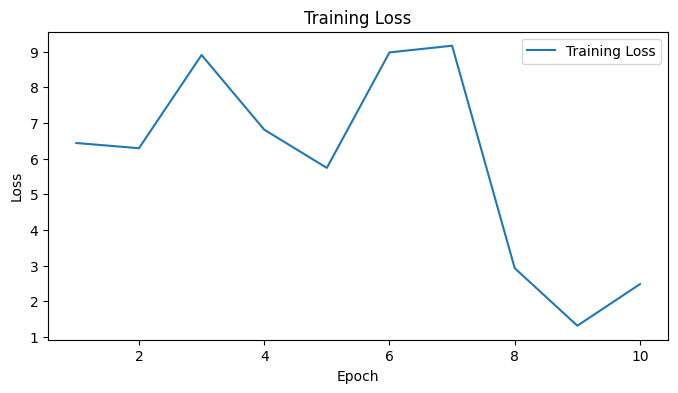

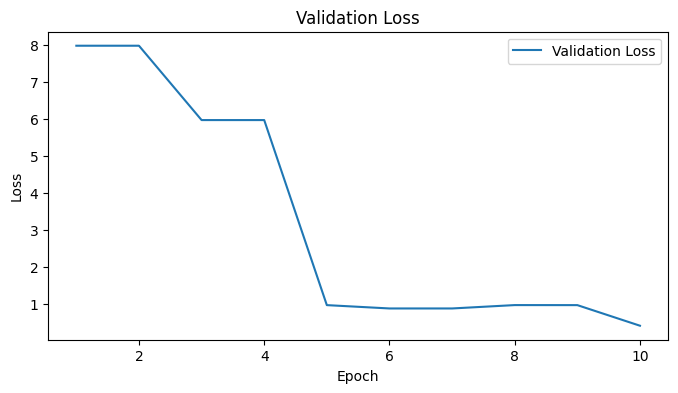

In [95]:
import matplotlib.pyplot as plt
# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot validation loss
plt.figure(figsize=(8, 4))
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [99]:
reports

tensor([[  25,    4,   26,  ..., 1679, 1679, 1679],
        [  67,   60,  312,  ..., 1679, 1679, 1679],
        [  25,  263,  326,  ..., 1679, 1679, 1679],
        ...,
        [  25,    4,    5,  ..., 1679, 1679, 1679],
        [  25,    4,    5,  ..., 1679, 1679, 1679],
        [  67,    5,  226,  ..., 1679, 1679, 1679]])

BLEU Score: 1.6350902417341726


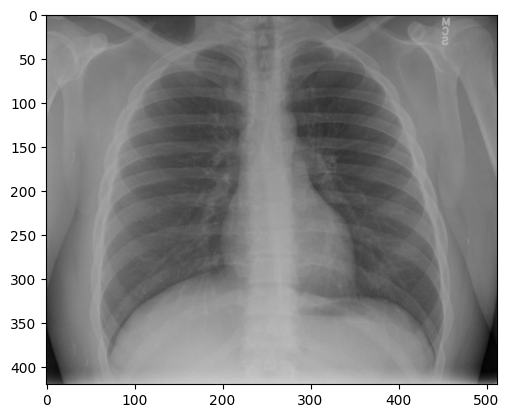

In [128]:
# bleu_score = nltk.translate.bleu_score.corpus_bleu(input_text, output_texts)
# Print the BLEU score
print(f'BLEU Score: {bleu_score:}')
plt.imshow(img)